In this script we will register the new dataset, consisting of the combined data from OPERA (https://github.com/kmansouri/OPERA, Mansouri, K., Grulke, C.M., Judson, R.S. et al. OPERA models for predicting physicochemical properties and environmental fate endpoints. J Cheminform 10, 10 (2018). https://doi.org/10.1186/s13321-018-0263-1) and Naef & Acree (Naef R, Acree WE Jr. Calculation of the Vapour Pressure of Organic Molecules by Means of a Group-Additivity Method and Their Resultant Gibbs Free Energy and Entropy of Vaporization at 298.15 K. Molecules. 2021 Feb 17;26(4):1045. doi: 10.3390/molecules26041045 PMID: 33671251; PMCID: PMC7922249.)

The tricky part is that we already have registered some molecules and their conformers for previous experiments, using a dataset compiled by Shuzhe Wang. 

Experiments with using different starting conformers for the simulations from which MDFPs are extracted showed that the increased benefit is not worth the extra cost, so for now we will only focus on one conformer per molecule.

As our lightweight regisration (lwreg) was set up in an older version, canonicalizing conformers was not yet possible, and therefore we need to be carefull not to add 'new' conformers of already registered molecules. Therefore, we can first check which molecules we already have in the database.

In [1]:
import lwreg
from lwreg import standardization_lib
from lwreg import utils
#using our standard settings for our databse cs_mdfps
config = lwreg.utils.defaultConfig()
config['dbtype'] = 'postgresql'
config['dbname'] = 'cs_mdfps'
config['host'] = 'lebanon'
config['user'] = 'cschiebroek'
config['password'] = '' 
config['standardization'] = standardization_lib.RemoveHs()
config['registerConformers'] = True

In [4]:
import pandas as pd
df_opera_naef_acree = pd.read_csv('OPERA_plus_Naef_Acree_incl_overlap_descriptors.csv')
#lets remove duplicates, keeping from OPERA
df_opera_naef_acree = df_opera_naef_acree.sort_values(by=['source'])
df_opera_naef_acree = df_opera_naef_acree.drop_duplicates(subset=['inchikey'],keep='last')
df_opera_naef_acree['source'].value_counts()

source
OPERA         2353
Naef_Acree    1069
Name: count, dtype: int64

In [6]:
smiles = df_opera_naef_acree['standardized_smiles'].tolist()

In [15]:
smiles_to_register, registered_smiles = [],[]
molregnos_already_registered = []
for smi in smiles:
    query = lwreg.query(config = config, smiles=smi)
    if len(query) == 0:
        smiles_to_register.append(smi)
    else:
        molregnos_already_registered.extend(query)
        registered_smiles.append(smi)


In [16]:
print(len(smiles_to_register),len(registered_smiles),len(molregnos_already_registered))

1520 1902 1902


Generating conformers for these molecules, using the exact same set-up as last time: confgen_uuid: 906589dd-76fa-4d7b-aa9f-1ee90abe3835, {"randomSeed": 61453, "enforceChirality": true, "MMFF_minimization": false}


In [24]:
rdkit_version_906589dd = "2023.03.3"
import rdkit
rdkit_version_now = rdkit.__version__
assert rdkit_version_906589dd == rdkit_version_now

In [27]:
smiles_to_register[0]

'C=C(F)C(F)(F)F'

In [46]:
#use exact same settings as last time:
#lets register the others
from rdkit.Chem import rdmolops
from rdkit.Chem import AllChem
from rdkit import Chem
registered_mols = []
new_molregnos = []
for smi in smiles_to_register:
    try:
        mol = Chem.AddHs(Chem.MolFromSmiles(smi, sanitize=True))
    except:
        print('failed for: ',smi)
        break
    AllChem.EmbedMolecule(mol, enforceChirality=True, randomSeed=0xf00d)
    rdmolops.AssignStereochemistryFrom3D(mol)
    used_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    mol.SetProp("_Name", used_smiles)
    mol.UpdatePropertyCache(strict=False)
    #register mol
    try:
        reg = lwreg.register(config=config,mol=mol)
        new_molregno = reg[0]
        new_molregnos.append(new_molregno)
        registered_mols.append(mol)
    except:
        print('registration failed for: ',smi)
        continue

registration failed for:  ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]4C[C@H]([C@H]5O[C@@H]45)[C@@H]3[C@@]1(Cl)C2(Cl)Cl


[10:30:26] UFFTYPER: Unrecognized atom type: S_6+6 (6)
[10:30:44] UFFTYPER: Unrecognized atom type: S_6+6 (5)
[10:30:45] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[10:30:45] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[10:30:51] UFFTYPER: Unrecognized atom type: S_6+6 (6)
[10:30:51] UFFTYPER: Unrecognized atom type: S_6+6 (17)
[10:30:53] UFFTYPER: Unrecognized atom type: S_6+6 (4)
[10:30:53] UFFTYPER: Unrecognized atom type: S_6+6 (11)
[10:30:54] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[10:30:54] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[10:30:55] UFFTYPER: Unrecognized atom type: S_6+6 (3)
[10:30:55] UFFTYPER: Unrecognized atom type: S_6+6 (11)
[10:30:56] UFFTYPER: Unrecognized atom type: S_6+6 (9)
[10:30:57] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[10:30:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:30:58] UFFTYPER: Unrecognized atom type: S_6+6 (7)
[10:30:58] UFFTYPER: Unrecognized atom type: S_6+6 (13)
[10:31:02] UFFTYPER: Unrecognized atom type: S_6+6 (6)
[10:3

registration failed for:  CCC(C)C(C)(C)CC
registration failed for:  ClC1(Cl)C2(Cl)C3(Cl)C4(Cl)C(Cl)(Cl)C5(Cl)C3(Cl)C1(Cl)C5(Cl)C24Cl
registration failed for:  C#CCOS(=O)OC1CCCCC1Oc1ccc(C(C)(C)C)cc1
registration failed for:  CCN(CC)C(=O)C(C)Oc1cccc2ccccc12
registration failed for:  CCOP(=S)(OCC)SC(CCl)N1C(=O)c2ccccc2C1=O
registration failed for:  CC(C)N(C(=O)SCC(Cl)=CCl)C(C)C
registration failed for:  COP(N)(=O)SC
registration failed for:  CCC(C)N
registration failed for:  CC(Cl)C(C)Cl
registration failed for:  COc1ccc(C(O)(c2cncnc2)C2CC2)cc1
registration failed for:  CCCCOCC1CO1
registration failed for:  CCCCCCC(C)S
registration failed for:  C=CC1CC2C=CC1C2
registration failed for:  CC1CCCC(C)(C)C1
registration failed for:  CC(=O)Nc1ccc(N=Nc2cc(C)ccc2O)cc1
registration failed for:  FC(Cl)C(F)(F)F
registration failed for:  COC1CCC=CO1
registration failed for:  CCN(CCO)c1ccc(N=Nc2ccc([N+](=O)[O-])cc2)cc1
registration failed for:  CC(C#N)CCC#N
registration failed for:  CC1CCC(C)C(C)C1C
re

[10:31:42] UFFTYPER: Unrecognized charge state for atom: 20


registration failed for:  CC(Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1)C(=O)OCC1CCCO1
registration failed for:  CC1COC(Cn2cncn2)(c2ccc(Oc3ccc(Cl)cc3)cc2Cl)O1
registration failed for:  CCCN(CC)CC1COC2(CCC(C(C)(C)C)CC2)O1
registration failed for:  OC(c1ccc(Cl)cc1)(c1cncnc1)c1ccccc1Cl
registration failed for:  CCC1(CC2(c3cccc(Cl)c3)CO2)C(=O)c2ccccc2C1=O
registration failed for:  C1CCC2CC2C1
registration failed for:  C1CC2CC12
registration failed for:  CCOc1cc(C(C)(C)C)ccc1C1COC(c2c(F)cccc2F)=N1
registration failed for:  CON=C(C)c1cccc(Oc2nc(OC)cc(OC)n2)c1C(=O)OC
registration failed for:  CC12CC1(C)C(=O)N(c1cc(Cl)cc(Cl)c1)C2=O
registration failed for:  CCON=C(OC(=O)c1ccccc1)c1c(OC)ccc(Cl)c1OC
registration failed for:  CCCSP(=S)(OCC)Oc1ccc(SC)cc1
registration failed for:  CCC(C)Nc1c([N+](=O)[O-])cc(C(C)(C)C)cc1[N+](=O)[O-]
registration failed for:  O=CNC(N1CCN(C(NC=O)C(Cl)(Cl)Cl)CC1)C(Cl)(Cl)Cl
registration failed for:  COCC(C)OCC(C)OCC(C)O
registration failed for:  CC=C(C)CCC
registration failed for:

[10:31:55] UFFTYPER: Unrecognized charge state for atom: 13


registration failed for:  CNC(=O)ON=CC(C)(C)SC
registration failed for:  CCC(C)C(=O)O
registration failed for:  CCCCCCCCC=CCCCCCCCC(=O)OC
registration failed for:  CCCCC(CC)CN1C(=O)C2C3C=CC(C3)C2C1=O
registration failed for:  O=C(c1ccccc1)C(O)c1ccccc1
registration failed for:  c1ccc(OCC2CO2)cc1
registration failed for:  CC(=O)C=Cc1ccccc1
registration failed for:  CC1OC(C)OC(C)O1
registration failed for:  CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC
registration failed for:  CC(O)CNCC(C)O
registration failed for:  CC=CCCCCC
registration failed for:  CC1CN1
registration failed for:  CC1CO1
registration failed for:  CC(N)CN
registration failed for:  CC(O)CN
registration failed for:  CC(O)C#N
registration failed for:  C1=CC2C3C=CC(C3)C2C1
registration failed for:  CCOP(=O)(C#N)N(C)C
registration failed for:  C=CC(C)(O)CCC=C(C)C
registration failed for:  CC(Br)CBr
registration failed for:  CCC(C)Br
registration failed for:  CCCCC(CC)COP(=O)(OCC(CC)CCCC)OCC(CC)CCCC
registration failed for:  OCC(S)CS
reg

[10:32:06] UFFTYPER: Unrecognized charge state for atom: 1


registration failed for:  CC1CCCO1
registration failed for:  CC(OP(C)(=O)F)C(C)(C)C
registration failed for:  CC=Cc1ccc(O)c(OC)c1
registration failed for:  CCOC(=O)C(C)O
registration failed for:  OCC(Br)CBr
registration failed for:  CC1CCC(C(C)C)CC1
registration failed for:  CC1=CCC(C(C)C)C=C1
registration failed for:  CCC(C)c1ccc(O)cc1
registration failed for:  C=CC1CC=CCC1
registration failed for:  CCCC(O)C(CC)CO
registration failed for:  OCC1CCCO1
registration failed for:  C=C1C2CCC(C2)C1(C)C
registration failed for:  CC=C(C)C(=O)O
registration failed for:  BrCC(Br)c1ccccc1
registration failed for:  CC(C=O)c1ccccc1
registration failed for:  CC(C)=C1CCC(C)CC1=O
registration failed for:  CCCCCCCC(C)O
registration failed for:  CCCCC(C)O
registration failed for:  O=C(Cl)C=CC(=O)Cl
registration failed for:  CCCCCCC(C)Cl
registration failed for:  CCCC(C)I
registration failed for:  CCCCC(C)Cl
registration failed for:  CC(Cl)c1ccccc1
registration failed for:  C=CC(Cl)CCl
registration failed

[10:32:17] UFFTYPER: Unrecognized charge state for atom: 10


registration failed for:  CNC(=O)ON=CC(C)(C)S(C)(=O)=O
registration failed for:  CCCCCCCCCC(C)O
registration failed for:  CCC(C)CCCC(C)C
registration failed for:  CCOP(=S)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1
registration failed for:  CCCCCC(C)CC
registration failed for:  CCCCC(C)CCC


[10:32:18] UFFTYPER: Unrecognized charge state for atom: 1


registration failed for:  CCCCC(CC)COC(=O)COc1cc(Cl)c(Cl)cc1Cl
registration failed for:  CCCCCC(C)Br
registration failed for:  CC1CCCCC1NC(=O)Nc1ccccc1
registration failed for:  CCC(C)C(C)C(C)C
registration failed for:  Clc1ccc(C(c2ccccc2Cl)C(Cl)(Cl)Cl)cc1
registration failed for:  CCOP(=S)(CC)Sc1ccccc1
registration failed for:  N#CCC=CCC#N
registration failed for:  CC(CO)c1ccccc1
registration failed for:  CC(C)C(C)C(C)(C)C
registration failed for:  CC12CCC(C1)C(C)(C)C2=O
registration failed for:  CC1COCc2cc3c(cc21)C(C)(C)C(C)C3(C)C
registration failed for:  CCCCC(CC)COP(=O)(Oc1ccccc1)Oc1ccccc1
registration failed for:  OC1CCCCC1c1ccccc1
registration failed for:  O=S1(=O)OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl
registration failed for:  CC1C=CCCC1
registration failed for:  CCOP(=S)(CC)Oc1cc(Cl)c(Cl)cc1Cl
registration failed for:  CP(=O)(F)OC1CCCCC1
registration failed for:  ClC1=C(Cl)C2(Cl)C3C(Cl)OC(Cl)C3C1(Cl)C2(Cl)Cl
registration failed for:  FC(Cl)C(F)(F)Cl
registration failed for:

In [48]:
mols_3d = []
for smi in smiles_to_register:
    try:
        mol = Chem.AddHs(Chem.MolFromSmiles(smi, sanitize=True))
    except:
        print('failed for: ',smi)
        break
    AllChem.EmbedMolecule(mol, enforceChirality=True, randomSeed=0xf00d)
    rdmolops.AssignStereochemistryFrom3D(mol)
    used_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    mol.SetProp("_Name", used_smiles)
    mol.UpdatePropertyCache(strict=False)
    mols_3d.append(mol)

[10:33:12] UFFTYPER: Unrecognized atom type: S_6+6 (6)
[10:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (5)
[10:33:19] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[10:33:19] UFFTYPER: Unrecognized atom type: S_5+4 (4)
[10:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (6)
[10:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (17)
[10:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (4)
[10:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (11)
[10:33:20] UFFTYPER: Unrecognized atom type: S_5+4 (7)
[10:33:20] UFFTYPER: Unrecognized atom type: S_5+4 (10)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (3)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (11)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (9)
[10:33:20] UFFTYPER: Unrecognized atom type: S_5+4 (5)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (7)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (13)
[10:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (6)
[10:3

In [50]:
#query these mols
not_found_counter = 0
not_found_mols = []
for m in mols_3d:
    query = lwreg.query(config = config, mol=m)
    if len(query) == 0:
        print('not found in database: ',Chem.MolToSmiles(m))
        not_found_counter += 1
        not_found_mols.append(m)
        print(not_found_counter)
    else:
        continue

not found in database:  [H]C1([H])[C@@]2([H])[C@]3([H])O[C@]3([H])[C@]1([H])[C@@]1([H])[C@@]2([H])[C@@]2(Cl)C(Cl)=C(Cl)[C@]1(Cl)C2(Cl)Cl
1
not found in database:  [H]C([H])([H])[Si](O[Si](O[Si](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])(O[Si](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])O[Si](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]
2


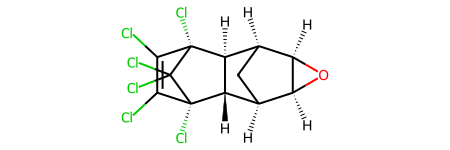

In [47]:
Chem.MolFromSmiles('ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]4C[C@H]([C@H]5O[C@@H]45)[C@@H]3[C@@]1(Cl)C2(Cl)Cl', sanitize=True)